# Titanic Train Project

In [1]:
# Importing important liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading DataFrame

df = pd.read_csv('titanic-train.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking shape of dataset

df.shape

(891, 13)

Dataset have 891 rows and 13 columns

In [5]:
# checking null values

df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As per data Age column have 177 null values , 687 null values in Cabin column and 02 null values in Embarked column

<AxesSubplot:>

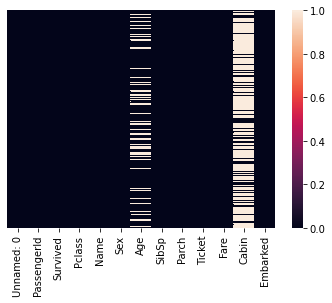

In [6]:
# checking the null values using heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [7]:
# We can see there are too many null values in cabin column we are droping it

df.drop(['Cabin'],axis=1, inplace=True)

In [8]:
# Filling missing values using .mean() in Age column

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
# Finding the mode value of 'Embarked' column

df['Embarked'].mode()

0    S
dtype: object

In [10]:
df['Embarked'].mode()[0]

'S'

In [11]:
# Filling missing values using .mode() in Embarked column

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As per data now there is no null values in our dataset

# Data Analysis

In [13]:
# Getting some statisical measures about the data

df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Finding the number of people survived and not survived 
# Died=0 , Alive=1

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

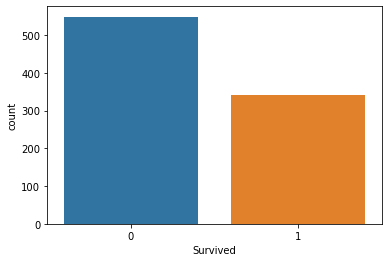

In [16]:
# Making a count plot for 'Survived' column
# Died=0 , Alive=1


print(df['Survived'].value_counts())
sns.countplot('Survived', data=df)

As per the graph more then 500 peoples Died

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

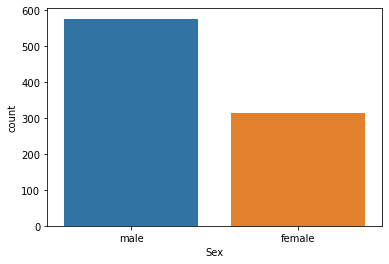

In [17]:
# Making a count plot for 'Sex' column
# Male=0, Female=1

print(df['Sex'].value_counts())
sns.countplot('Sex', data=df)

As per the graph more then 500 male peoples Died

<AxesSubplot:xlabel='Sex', ylabel='count'>

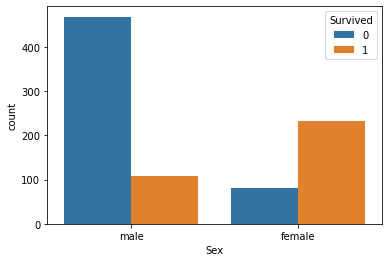

In [18]:
# Number of Survivors Gender wise

sns.countplot('Sex', hue='Survived', data=df)

We can see in the graph that male peoples are died more than women

<AxesSubplot:xlabel='Pclass', ylabel='count'>

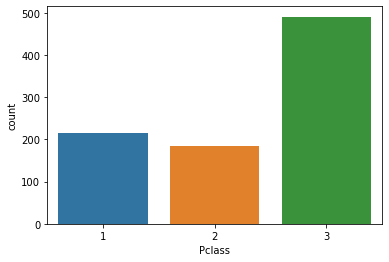

In [19]:
# We have 1,2 and 3 classes in the dataset

sns.countplot('Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

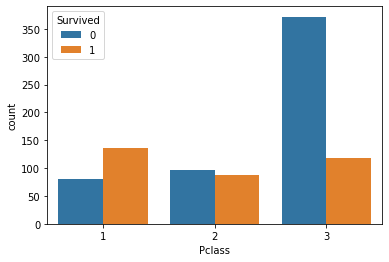

In [20]:
# Number of peoples Survived as per Pclass
# Died=0 , Alive=1

sns.countplot('Pclass', hue='Survived', data=df)

We can see that maximum peoples are died in Pclass 3

# Encoding the categorical Columns

In [21]:
# Printing the data

df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
# Checking how many males and females are in the dataset

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
# Checking from where all the passengers are belongs

df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
# Converting categorical columns

df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [25]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [26]:
# Droping all unwanted columns

df.drop(['Unnamed: 0', 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket',], axis=1, inplace=True)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0


# Seperating Features and Target

In [28]:
# spliting the data into the target and feature variables

Y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [29]:
X

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.000000,7.2500,0
1,1,1,38.000000,71.2833,1
2,3,1,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,3,0,35.000000,8.0500,0
...,...,...,...,...,...
886,2,0,27.000000,13.0000,0
887,1,1,19.000000,30.0000,0
888,3,1,29.699118,23.4500,0
889,1,0,26.000000,30.0000,1


In [30]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Spliting teh data into training data and test data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
# Checking the data dristribution of X_train & X_test

X.shape, X_train.shape, X_test.shape

((891, 5), (712, 5), (179, 5))

# Model Training

**Logistic Regression**

In [33]:
lr = LogisticRegression()

# Training the Logistic Regression model with training data

lr.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

**Accuracy Score**

In [34]:
# Accuracy of training data

y_pred = lr.predict(X_train)

In [35]:
print(y_pred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 1 0 

This is prediction values. Let's compair with origival values

In [36]:
# Compairing the accuracy of training data with original data

traning_data_accuracy = accuracy_score(Y_train, y_pred)
print('Accuracy score of traning data :', traning_data_accuracy)

Accuracy score of traning data : 0.8089887640449438


In [37]:
# # Accuracy of test data

y_pred1 = lr.predict(X_test)

In [38]:
print(y_pred1)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [39]:
# Compairing the accuracy of test data with original data

Test_data_accuracy = accuracy_score(Y_test, y_pred1)
print('Accuracy score of test data :', Test_data_accuracy)

Accuracy score of test data : 0.776536312849162


Now we can see that the training data accuracy and test data accuracys are slitly different so it means that there is no underfitting and no overfitting.

**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Training the Randon Forest classifier with traning data

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred2 = rfc.predict(X_train)

In [48]:
# Checking the accuracy of traning data

traning_data_accuracy = accuracy_score(Y_train, y_pred2)
print('Accuracy score of traning data :', traning_data_accuracy)

Accuracy score of traning data : 0.9845505617977528


**Decision Tree**

In [52]:
# Decision Tree

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Initializing classifier
dtc = DecisionTreeClassifier(random_state=8, max_depth=6)

# Traning classifier
dtc.fit(X_train, Y_train)

# Evaluate the classifier
print(dtc.score(X_test, Y_test))

0.7597765363128491


**KNN**

In [53]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Initializing classifier and giving hyperparameter K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Traning classifier
knn.fit(X_train, Y_train)

# Evaluate the classifier
print(knn.score(X_test, Y_test))


# Try changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.6424581005586593
0.6703910614525139
